In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

In [2]:
from evaluator.tester import Tester, train_ds, val_ds, test_ds

e:\RUSHIL\Courses\Agentic_AI\AI_Engineer_Core\ai-pricer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
# ElasticNet regressor model
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import ElasticNet

documents = [item.summary for item in train_ds]
vectorizer = CountVectorizer(max_features=1000, stop_words="english")
model = ElasticNet()

x_train = vectorizer.fit_transform(documents)
y_train = np.array([float(item.price) for item in train_ds])
model.fit(x_train, y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the penalty terms. Defaults to 1.0.See the notes for the exact mathematical meaning of thisparameter. ``alpha = 0`` is equivalent to an ordinary least square,solved by the :class:`LinearRegression` object. For numericalreasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.Given this, you should use the :class:`LinearRegression` object.",1.0
,"l1_ratio l1_ratio: float, default=0.5The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` itis an L1 penalty. For ``0 < l1_ratio < 1``, the penalty is acombination of L1 and L2.",0.5
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If ``False``, thedata is assumed to be already centered.",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.Check :ref:`an example on how to use a precomputed Gram Matrix in ElasticNet`for details.",False
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [4]:
from models.item import Item


def elasticnet_regression(item: Item) -> float:
    summary = item.summary
    x = vectorizer.transform([summary])
    y = (model.predict(x))[0]
    return max(0, float(y))

1: Guess: $38.46 Truth: $35.00 Error: $3.46 SLE: 0.01 Item: Small Soar Dove Bird Necklace, Delicate ...
2: Guess: $46.36 Truth: $25.00 Error: $21.36 SLE: 0.36 Item: Omaha Steaks Gift Card
3: Guess: $70.48 Truth: $285.00 Error: $214.52 SLE: 1.92 Item: Ohana Baritone Ukulele Model BK-20CE
4: Guess: $33.77 Truth: $4.88 Error: $28.89 SLE: 3.16 Item: BodyGuardz - Pure 2 Edge Glass Screen Pr...
5: Guess: $32.04 Truth: $5.00 Error: $27.04 SLE: 2.91 Item: Numer 1 Dad Iron On Decal, Father's Day ...
6: Guess: $35.32 Truth: $16.99 Error: $18.33 SLE: 0.49 Item: I Love My Maltese Rhinestone Iron on Tra...
7: Guess: $69.42 Truth: $84.99 Error: $15.57 SLE: 0.04 Item: JJ Electronics Amplifier Tubes (T-EL84-J...
8: Guess: $41.88 Truth: $18.99 Error: $22.89 SLE: 0.58 Item: Women’s Satin Kimono Robe for Bridesmaid...
9: Guess: $54.23 Truth: $22.08 Error: $32.15 SLE: 0.76 Item: Monoprice PLA Plus+ Premium 3D Filament ...
10: Guess: $47.16 Truth: $39.98 Error: $7.18 SLE: 0.03 Item: LOVEVOOK Laptop Backpac

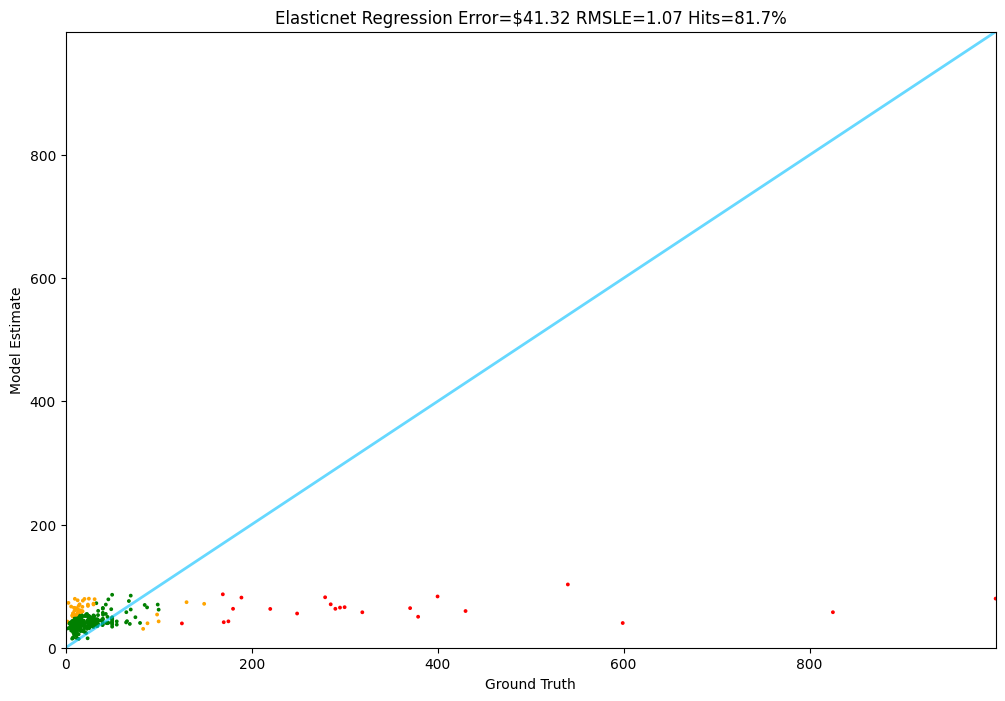

In [5]:
Tester.test(elasticnet_regression)